In [6]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [7]:


# Define HH model parameters
g_Na = 120.0  # Sodium conductance (mS/cm^2)
g_K = 36.0   # Potassium conductance (mS/cm^2)
g_L = 0.3    # Leak conductance (mS/cm^2)
E_Na = 50.0  # Sodium reversal potential (mV)
E_K = -77.0  # Potassium reversal potential (mV)
E_L = -55.0  # Leak reversal potential (mV)
C_m = 1.0    # Membrane capacitance (uF/cm^2)

# Define the HH model equations
def alpha_m(V):
    return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65.0) / 18.0)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65.0) / 20.0)

def beta_h(V):
    return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

def alpha_n(V):
    return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80.0)

# Define the HH model differential equations
def hodgkin_huxley_eq(V, m, h, n, I_params, t):
    I = I_params[0]*np.sin(I_params[1]*t)
    dVdt = (I - g_Na * m**3 * h * (V - E_Na) - g_K * n**4 * (V - E_K) - g_L * (V - E_L)) / C_m
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    return dVdt, dmdt, dhdt, dndt

# Define time parameters
dt = 0.01  # Time step (ms)
t = np.arange(0, 50, dt)  # Time vector (ms)

# Define input stimulus waveform (e.g., a step current)
I_stimulus = np.zeros_like(t)
I_stimulus[100:500] = 10.0  # Apply a current step from 100 ms to 500 ms

# Initialize state variables
V0 = -65.0  # Membrane voltage (mV)
m, h, n = 0.05, 0.6, 0.32  # Initial values of gating variables

# Simulate the HH model and record data
V_record = np.zeros_like(t)
V = V0

A = 1.0
w = 1.0

I_params = np.array([A, w])

for i in range(len(t)):
    V_record[i] = V
    dVdt, dmdt, dhdt, dndt = hodgkin_huxley_eq(V, m, h, n, I_params, t[i])
    V += dVdt * dt
    m += dmdt * dt
    h += dhdt * dt
    n += dndt * dt
def integrate_HH(V0, m, h, n, I_params, dt, t):
    
    V_record = np.zeros_like(t)
    V = V0
    
    for i in range(len(t)):
        V_record[i] = V
        dVdt, dmdt, dhdt, dndt = hodgkin_huxley_eq(V, m, h, n, I_params, t[i])
        V += dVdt * dt
        m += dmdt * dt
        h += dhdt * dt
        n += dndt * dt
    return V_record


    
  

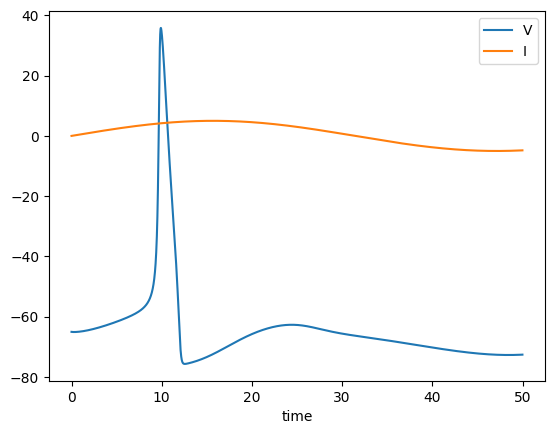

In [9]:
A = 5
w = 0.1

I_params = np.array([A, w])

V_record = integrate_HH(V0, m, h, n, I_params, dt, t)

I_stimulus = A*np.sin(w*t)

plt.plot(t, V_record, label = 'V')
plt.plot(t, I_stimulus, label = 'I')
plt.xlabel('time')
plt.legend()

In [10]:
type(V_record)

numpy.ndarray

In [30]:
def elu_norm(voltage, alpha = 0.001):
    thresh = -40  # Adjust this as needed
    exponentiated_values = np.where(voltage <= thresh, alpha*(np.exp(voltage)-np.exp(thresh)), voltage)
    return exponentiated_values


In [31]:
reg_data = elu_norm(V_record)

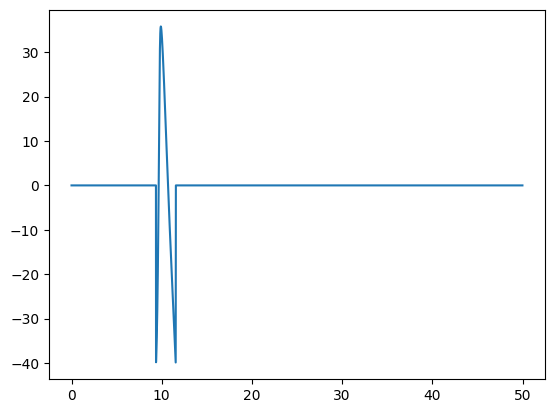

In [32]:
plt.plot(t, reg_data, label = 'V')

In [40]:
def elu_normed(voltage, alpha = 0.01):
    thresh = -40  # Adjust this as needed
    exponentiated_values = np.where(voltage <= 0.0, alpha*(np.exp(voltage)-1.0, voltage))
    return exponentiated_values


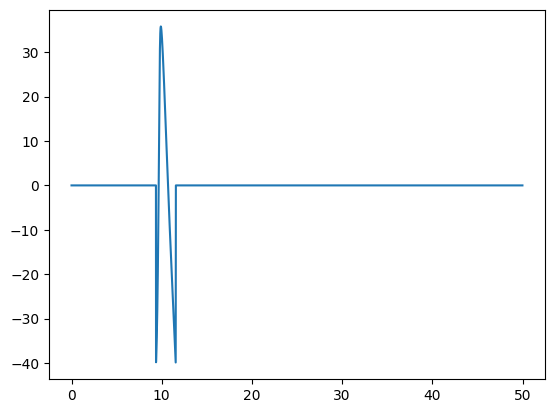

In [42]:
def shift_and_elu_normalize(x, shift_value=40):
    shifted_values = x - shift_value
    elu_normalized_values = np.where(shifted_values <= 0, np.exp(shifted_values) - 1, shifted_values)
    return elu_normalized_values

shifted = shift_and_elu_normalize(V_record)
plt.plot(t, reg_data, label = 'V')
